### Evaluating the Logistic Regression Model

#### Import libraries, data and pickles

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [4]:
with open('./pickles/gs_lr.pkl', 'rb') as x:
    gs_lr = pickle.load(x)

In [5]:
df= pd.read_csv('./data/cleaned_posts.csv')

In [6]:
X=df['selftext']
y=df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, stratify=y)

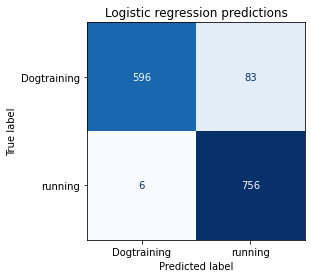

In [7]:
ConfusionMatrixDisplay.from_estimator(gs_lr, X_test,y_test, cmap='Blues', colorbar=False);
plt.title('Logistic regression predictions');

#### Look at misclassified posts

In [9]:
lr_preds = gs_lr.predict(X_test)

In [10]:
misclass = X_test.copy()

In [11]:
misclass = pd.DataFrame(misclass)

In [12]:
misclass['pred_subreddit']= lr_preds

In [13]:
misclass['true_subreddit']= y_test

In [26]:
misclass[misclass['pred_subreddit']!= misclass['true_subreddit']].head(10)

,selftext,pred_subreddit,true_subreddit
1984,[removed],running,Dogtraining
1287,"It’s an useful command, but there is only a fe...",running,Dogtraining
1227,I thought I would come here because anyone who...,running,Dogtraining
271,[removed],running,Dogtraining
2471,[removed],running,Dogtraining
2260,[removed],running,Dogtraining
2342,I want to transition from giving my puppy 3 me...,running,Dogtraining
1713,[removed],running,Dogtraining
2237,Trying to begin scentwork with my dog and I wa...,running,Dogtraining
43,[removed],running,Dogtraining


89 posts were misclassified

In [18]:
misclass[misclass['pred_subreddit']!= misclass['true_subreddit']]['selftext'].value_counts().head(1)

[removed]    38
Name: selftext, dtype: int64

Of the 89 misclassified posts, 38 had the text removed and replaced with [removed]. It makes sense that many of these would be misclassified as there is no information for the model to make a decision.

#### Looking at the metrics

In [21]:
f1_score(np.where(y_test=='Dogtraining',0,1), np.where(lr_preds=='Dogtraining',0,1))

0.9444097439100562

In [22]:
precision_score(np.where(y_test=='Dogtraining',0,1), np.where(lr_preds=='Dogtraining',0,1))

0.901072705601907

In [24]:
recall_score(np.where(y_test=='Dogtraining',0,1), np.where(lr_preds=='Dogtraining',0,1))

0.9921259842519685

The model performs very well across all metrics